In [2]:
import os
os.getcwd()

'/content'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log
import plotly.offline as py

In [3]:
# import dataset
df = pd.read_csv('/content/TCS.NS.csv')
df.head()

Date         Open         High          Low        Close  \
0  2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976   
1  2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976   
2  2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049   
3  2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951   
4  2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049   

     Adj Close   Volume  
0  1779.321777  2449622  
1  1789.614380  2635047  
2  1801.875488  2539884  
3  1810.288330  2031071  
4  1803.217896  3111689

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [ ]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Volume'])

0.2528871438997474

In [ ]:
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))

0.00020847298932672522
0.00020450938267665904


In [ ]:
# Steps: 5 Pre-requisite rule in TSF
1) Every data should be numeric in nature, not in category
2) Data type is correct or not - datetime column and target variable should be numeric
3) There should not be any missing data, if yes, first impute and then try to solve time series forecasting
4) Data should be in sequential order (Timeseries always in an ascending order)
5) Whether data has Trend, Seasonality, Error or abrupt changes or something x changes

SyntaxError: unmatched ')' (3935409757.py, line 2)

##### Series has to be read as a daily series with Mon-Friday as Weekdays, hence frequency is defined as business day. else if you define frequency as 365, it would assume that exchange was working for all 365 days.

In [ ]:
from pandas.tseries.offsets import BDay # BDay - business day (Mon-Friday)

In [ ]:
df.shape

(1235, 7)

In [ ]:
df.head()

Date         Open         High          Low        Close    Adj Close  \
0 2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976  1779.321777   
1 2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976  1789.614380   
2 2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049  1801.875488   
3 2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951  1810.288330   
4 2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049  1803.217896   

    Volume  
0  2449622  
1  2635047  
2  2539884  
3  2031071  
4  3111689

In [ ]:
df_date = df[['Date','Volume']]

In [ ]:
df_date.head()

Date   Volume
0 2019-03-05  2449622
1 2019-03-06  2635047
2 2019-03-07  2539884
3 2019-03-08  2031071
4 2019-03-11  3111689

In [ ]:
df_date.tail()

Date   Volume
1230 2024-02-26  1379284
1231 2024-02-27  2960475
1232 2024-02-28  1939225
1233 2024-02-29  3772719
1234 2024-03-01  2043265

In [ ]:
date1 = pd.date_range(start='3/5/2019', end='3/1/2024', freq=BDay())
date1

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', length=1304, freq='B')

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar =USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [ ]:
date1 = pd.date_range(start='3/5/2019', end='3/1/2024', freq=us_bd)
date1

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2024-02-16', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', length=1251, freq='C')

In [ ]:
df_final = pd.read_csv('TCS.NS.csv', parse_dates=True, squeeze=True, index_col=0)
# squeeze : True will return the index col as series

In [ ]:
df_final.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976  1779.321777   
2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976  1789.614380   
2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049  1801.875488   
2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951  1810.288330   
2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049  1803.217896   

             Volume  
Date                 
2019-03-05  2449622  
2019-03-06  2635047  
2019-03-07  2539884  
2019-03-08  2031071  
2019-03-11  3111689

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-03-05 to 2024-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


<Figure size 2000x1400 with 0 Axes>

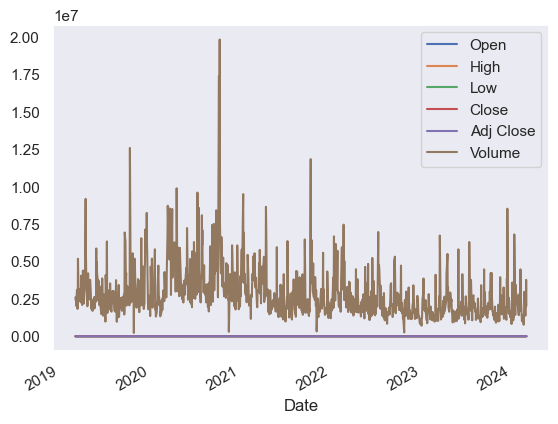

In [ ]:
plt.figure(figsize=(20,14))
df_final.plot()
plt.grid()

### Plot the boxplot of the "Open" variable with respect to the different years

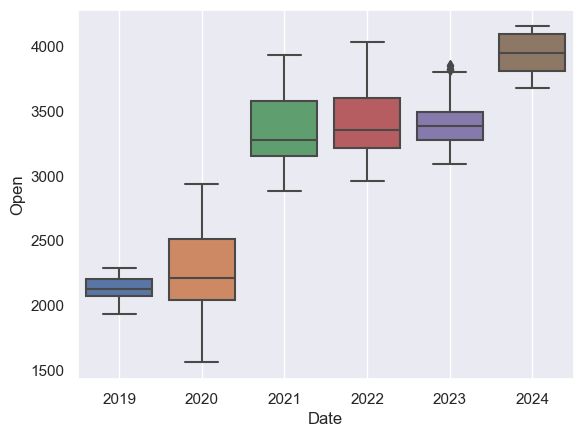

In [ ]:
sns.boxplot(x = df_final.index.year, y = df_final['Open'])
plt.grid()

### Plot the boxplot of the "Open" variable with respect to the different months

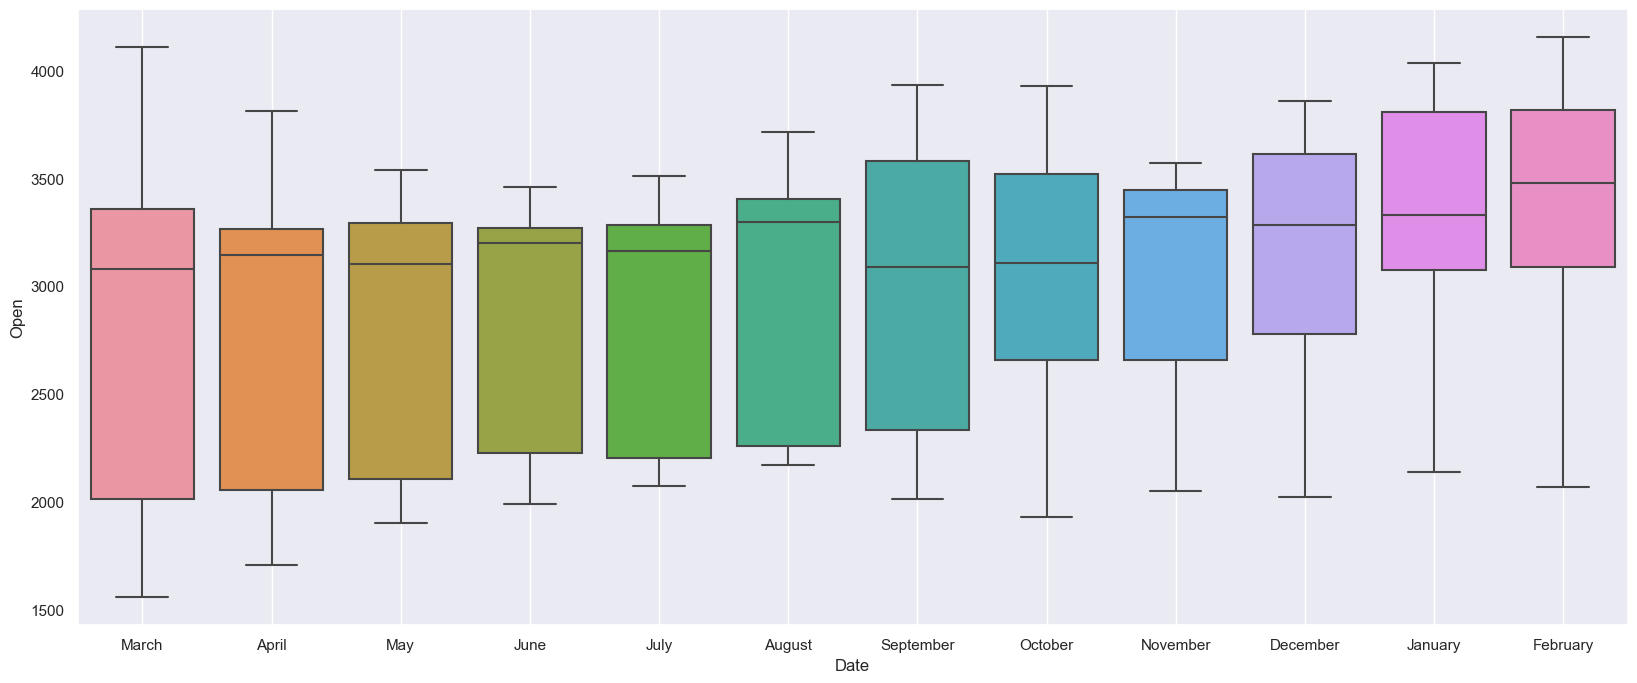

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x = df_final.index.month_name(), y = df_final['Open'])
plt.grid()

<Figure size 2000x1200 with 0 Axes>

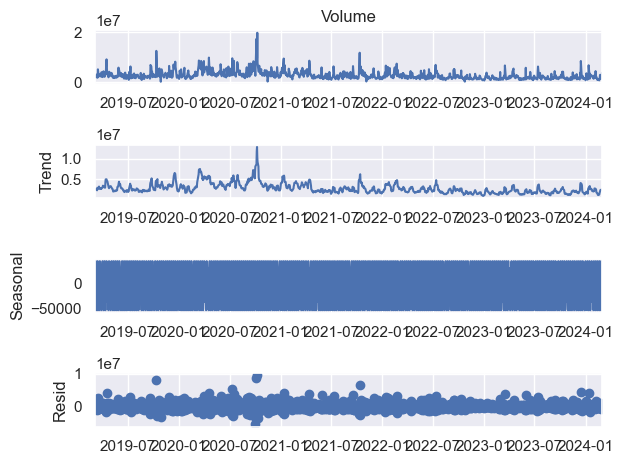

In [ ]:
# Decomposition
plt.figure(figsize=(20,12))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Volume'], period=5)
decomposition.plot()
plt.show()

<Figure size 2000x1200 with 0 Axes>

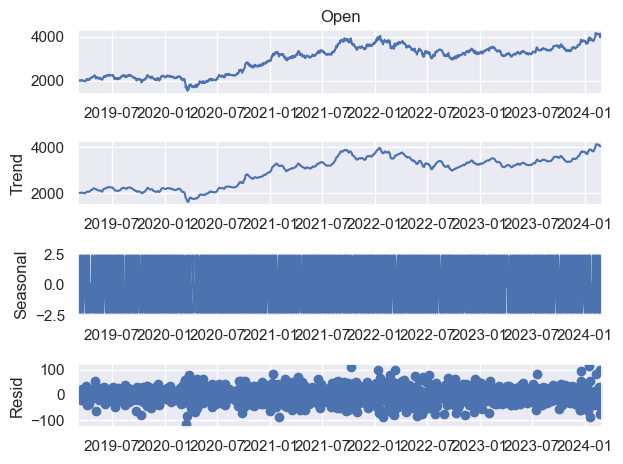

In [ ]:
# Decomposition
plt.figure(figsize=(20,12))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Open'], period=5)
decomposition.plot()
plt.show()

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
resid = decomposition.resid

print("Trend", '\n', trend.head(12),'\n')
print("Seasonal", '\n', seasonality.head(12),'\n')
print("resid", '\n', resid.head(12),'\n')

Trend 
 Date
2019-03-05            NaN
2019-03-06            NaN
2019-03-07    2010.640015
2019-03-08    2012.450024
2019-03-11    2017.190015
2019-03-12    2017.180005
2019-03-13    2011.960010
2019-03-14    2014.780005
2019-03-15    2017.969995
2019-03-18    2020.969995
2019-03-19    2022.980005
2019-03-20    2024.760010
Name: trend, dtype: float64 

Seasonal 
 Date
2019-03-05   -0.146904
2019-03-06    2.444764
2019-03-07   -2.303358
2019-03-08   -0.052551
2019-03-11    0.058049
2019-03-12   -0.146904
2019-03-13    2.444764
2019-03-14   -2.303358
2019-03-15   -0.052551
2019-03-18    0.058049
2019-03-19   -0.146904
2019-03-20    2.444764
Name: seasonal, dtype: float64 

resid 
 Date
2019-03-05          NaN
2019-03-06          NaN
2019-03-07    -3.336656
2019-03-08    12.602527
2019-03-11    11.651960
2019-03-12    -2.983052
2019-03-13    -1.404774
2019-03-14    -7.526695
2019-03-15   -19.017420
2019-03-18    21.971956
2019-03-19     7.166899
2019-03-20     0.795226
Name: resid, dtype:

In [ ]:
df_final.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976  1779.321777   
2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976  1789.614380   
2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049  1801.875488   
2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951  1810.288330   
2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049  1803.217896   

             Volume  
Date                 
2019-03-05  2449622  
2019-03-06  2635047  
2019-03-07  2539884  
2019-03-08  2031071  
2019-03-11  3111689

In [ ]:
df_final['Year'] = df_final.index.year
df_final['Month'] = df_final.index.month
df_final['Days'] = df_final.index.day
df_final.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976  1779.321777   
2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976  1789.614380   
2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049  1801.875488   
2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951  1810.288330   
2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049  1803.217896   

             Volume  Year  Month  Days  
Date                                    
2019-03-05  2449622  2019      3     5  
2019-03-06  2635047  2019      3     6  
2019-03-07  2539884  2019      3     7  
2019-03-08  2031071  2019      3     8  
2019-03-11  3111689  2019      3    11

In [ ]:
df = pd.read_csv('TCS.NS.csv')
df.head()

Date         Open         High          Low        Close    Adj Close  \
0   3/5/2019  2005.000000  2007.000000  1976.599976  1988.099976  1779.321777   
1   3/6/2019  1989.300049  2015.000000  1985.050049  1999.599976  1789.614380   
2   3/7/2019  2005.000000  2024.050049  2000.199951  2013.300049  1801.875488   
3   3/8/2019  2025.000000  2033.000000  2010.050049  2022.699951  1810.288330   
4  3/11/2019  2028.900024  2033.000000  2003.650024  2014.800049  1803.217896   

    Volume  
0  2449622  
1  2635047  
2  2539884  
3  2031071  
4  3111689

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [ ]:
df['Time_stamp'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1235 non-null   object        
 1   Open        1235 non-null   float64       
 2   High        1235 non-null   float64       
 3   Low         1235 non-null   float64       
 4   Close       1235 non-null   float64       
 5   Adj Close   1235 non-null   float64       
 6   Volume      1235 non-null   int64         
 7   Time_stamp  1235 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 77.3+ KB


In [ ]:
df_final_model = df.set_index('Time_stamp')
df_final_model.head()

Date         Open         High          Low        Close  \
Time_stamp                                                                  
2019-03-05   3/5/2019  2005.000000  2007.000000  1976.599976  1988.099976   
2019-03-06   3/6/2019  1989.300049  2015.000000  1985.050049  1999.599976   
2019-03-07   3/7/2019  2005.000000  2024.050049  2000.199951  2013.300049   
2019-03-08   3/8/2019  2025.000000  2033.000000  2010.050049  2022.699951   
2019-03-11  3/11/2019  2028.900024  2033.000000  2003.650024  2014.800049   

              Adj Close   Volume  
Time_stamp                        
2019-03-05  1779.321777  2449622  
2019-03-06  1789.614380  2635047  
2019-03-07  1801.875488  2539884  
2019-03-08  1810.288330  2031071  
2019-03-11  1803.217896  3111689

In [ ]:
df_final_model['Year'] = df_final_model.index.year
df_final_model['Month'] = df_final_model.index.month
df_final_model.head()

Date         Open         High          Low        Close  \
Time_stamp                                                                  
2019-03-05   3/5/2019  2005.000000  2007.000000  1976.599976  1988.099976   
2019-03-06   3/6/2019  1989.300049  2015.000000  1985.050049  1999.599976   
2019-03-07   3/7/2019  2005.000000  2024.050049  2000.199951  2013.300049   
2019-03-08   3/8/2019  2025.000000  2033.000000  2010.050049  2022.699951   
2019-03-11  3/11/2019  2028.900024  2033.000000  2003.650024  2014.800049   

              Adj Close   Volume  Year  Month  
Time_stamp                                     
2019-03-05  1779.321777  2449622  2019      3  
2019-03-06  1789.614380  2635047  2019      3  
2019-03-07  1801.875488  2539884  2019      3  
2019-03-08  1810.288330  2031071  2019      3  
2019-03-11  1803.217896  3111689  2019      3

In [ ]:
df_final_model.tail()

Date         Open         High          Low        Close  \
Time_stamp                                                                  
2024-02-26  2/26/2024  4036.000000  4050.000000  3982.750000  4001.050049   
2024-02-27  2/27/2024  3999.000000  4124.000000  3999.000000  4104.399902   
2024-02-28  2/28/2024  4095.600098  4154.899902  4089.000000  4118.950195   
2024-02-29  2/29/2024  4099.000000  4138.100098  4064.550049  4095.100098   
2024-03-01   3/1/2024  4107.200195  4140.000000  4086.800049  4094.350098   

              Adj Close   Volume  Year  Month  
Time_stamp                                     
2024-02-26  4001.050049  1379284  2024      2  
2024-02-27  4104.399902  2960475  2024      2  
2024-02-28  4118.950195  1939225  2024      2  
2024-02-29  4095.100098  3772719  2024      2  
2024-03-01  4094.350098  2043265  2024      3

In [ ]:
df_final_model.shape

(1235, 9)

In [ ]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2023-6-01')]
train.shape

(1048, 9)

In [ ]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2023-6-01')]
test.shape

(187, 9)

In [ ]:
train.tail()

Date         Open         High          Low        Close  \
Time_stamp                                                                  
2023-05-25  5/25/2023  3294.000000  3306.000000  3267.100098  3293.500000   
2023-05-26  5/26/2023  3293.500000  3338.649902  3291.000000  3328.899902   
2023-05-29  5/29/2023  3360.800049  3372.000000  3312.000000  3320.350098   
2023-05-30  5/30/2023  3315.000000  3326.949951  3301.350098  3316.199951   
2023-05-31  5/31/2023  3309.000000  3327.699951  3265.149902  3289.500000   

              Adj Close   Volume  Year  Month  
Time_stamp                                     
2023-05-25  3237.291748  1374917  2023      5  
2023-05-26  3272.087158  1791115  2023      5  
2023-05-29  3263.683594  1210372  2023      5  
2023-05-30  3259.604248  1344224  2023      5  
2023-05-31  3233.359863  5815424  2023      5

In [ ]:
test.head()

Date     Open         High          Low        Close  \
Time_stamp                                                             
2023-06-01  6/1/2023  3314.00  3340.000000  3297.500000  3324.000000   
2023-06-02  6/2/2023  3326.25  3335.899902  3297.449951  3305.600098   
2023-06-05  6/5/2023  3315.00  3327.000000  3285.050049  3288.899902   
2023-06-06  6/6/2023  3280.00  3288.850098  3220.600098  3232.300049   
2023-06-07  6/7/2023  3253.00  3278.850098  3241.000000  3274.899902   

              Adj Close   Volume  Year  Month  
Time_stamp                                     
2023-06-01  3267.271240  1177314  2023      6  
2023-06-02  3249.185303  2030661  2023      6  
2023-06-05  3232.770020  1861468  2023      6  
2023-06-06  3177.136230  2022849  2023      6  
2023-06-07  3219.008789  1567196  2023      6

In [ ]:
test.tail()

Date         Open         High          Low        Close  \
Time_stamp                                                                  
2024-02-26  2/26/2024  4036.000000  4050.000000  3982.750000  4001.050049   
2024-02-27  2/27/2024  3999.000000  4124.000000  3999.000000  4104.399902   
2024-02-28  2/28/2024  4095.600098  4154.899902  4089.000000  4118.950195   
2024-02-29  2/29/2024  4099.000000  4138.100098  4064.550049  4095.100098   
2024-03-01   3/1/2024  4107.200195  4140.000000  4086.800049  4094.350098   

              Adj Close   Volume  Year  Month  
Time_stamp                                     
2024-02-26  4001.050049  1379284  2024      2  
2024-02-27  4104.399902  2960475  2024      2  
2024-02-28  4118.950195  1939225  2024      2  
2024-02-29  4095.100098  3772719  2024      2  
2024-03-01  4094.350098  2043265  2024      3

In [ ]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [ ]:
train_final.head()

Volume
Time_stamp         
2019-03-05  2449622
2019-03-06  2635047
2019-03-07  2539884
2019-03-08  2031071
2019-03-11  3111689

In [ ]:
test_final.tail()

Volume
Time_stamp         
2024-02-26  1379284
2024-02-27  2960475
2024-02-28  1939225
2024-02-29  3772719
2024-03-01  2043265

# Check for stationarity of the series at alpha <= 0.05 using appropriate statistical test(hypothetical test)

In [ ]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

# there are two methods avaiable - hypothesis testing, rolling stats
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    # plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolstd, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Stadard Deviation - Stationary or Not!!")
    plt.show(block=False)

    # Perform Dickey Fuller Test
    print("Results of Dickey Fuller Test :")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF Test stats', 'P-Value','#Lags', 'No. of Observation'])
    for key, value in dftest[4].items():
        dfoutput['Critical values (%s)'%key] = value
    print(dfoutput, '\n')

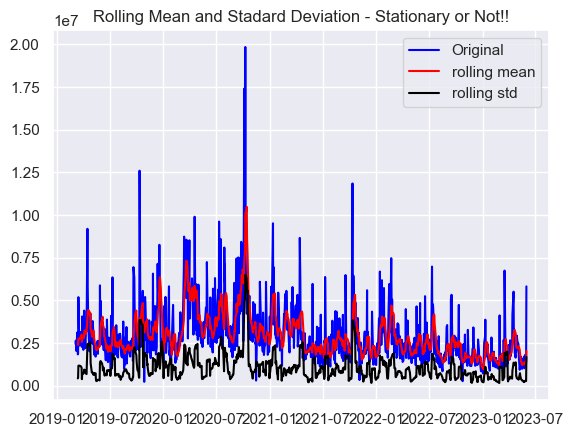

Results of Dickey Fuller Test :
ADF Test stats          -6.040931e+00
P-Value                  1.346577e-07
#Lags                    7.000000e+00
No. of Observation       1.040000e+03
Critical values (1%)    -3.436653e+00
Critical values (5%)    -2.864323e+00
Critical values (10%)   -2.568252e+00
dtype: float64 



In [ ]:
test_stationarity(train_final['Volume'])

In [ ]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or Not")
    labels = ['ADF Test stats', 'P-Value','#Lags', 'No. of Observation']

    for i, j in zip(result, labels):
        print(j + " :-->" + str(i) )

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothesis and my times series is non-stationary")

In [ ]:
check_adftest(train_final['Volume'])

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-6.0409308076240364
P-Value :-->1.3465766499909795e-07
#Lags :-->7
No. of Observation :-->1040
Strong evidence against null hypothesis and my time series is Stationary


# TSeries is Stationary at 5% alpha value as per Dickey Fuller Test

In [ ]:
import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p, d, q)) # trend (pdq)

model_pdq = [(x[0], x[1],x[2], 5) for x in list(itertools.product(p, d, q))] # seasonality (PDQ)
print("Example of parameter combinations for Model.....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[1], model_pdq[0]))
print('Model : {}{}'.format(pdq[0], model_pdq[1]))
print('Model : {}{}'.format(pdq[2], model_pdq[1]))

Example of parameter combinations for Model.....
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 1)(0, 0, 2, 5)
Model : (0, 0, 1)(0, 0, 0, 5)
Model : (0, 0, 0)(0, 0, 1, 5)
Model : (0, 0, 2)(0, 0, 1, 5)


# Building ARIMA Model

In [ ]:
# creating an empty DataFrame with column names
dfobj = pd.DataFrame(columns=['Param', 'AIC'])
dfobj

Empty DataFrame
Columns: [Param, AIC]
Index: []

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    mod = ARIMA(train_final['Volume'], order=param)
    results_ARIMA = mod.fit()
    print("ARIMA{} - AIC :{}".format(param, results_ARIMA.aic))
    dfobj = dfobj.append({'param':param, 'AIC':results_ARIMA.aic}, ignore_index=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date

ARIMA(0, 0, 0) - AIC :39325.42547757208
ARIMA(0, 0, 1) - AIC :32858.72173286214


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 2) - AIC :32819.37840001695
ARIMA(1, 0, 0) - AIC :32748.45822861771


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date

ARIMA(1, 0, 1) - AIC :32665.568108813826


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 2) - AIC :32654.458793622012


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 0) - AIC :32712.333056998363


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 1) - AIC :32655.212014523157


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 2) - AIC :32654.7643348715


In [ ]:
dfobj.sort_values(by=['AIC'])

Param           AIC      param
5   NaN  32654.458794  (1, 0, 2)
8   NaN  32654.764335  (2, 0, 2)
7   NaN  32655.212015  (2, 0, 1)
4   NaN  32665.568109  (1, 0, 1)
6   NaN  32712.333057  (2, 0, 0)
3   NaN  32748.458229  (1, 0, 0)
2   NaN  32819.378400  (0, 0, 2)
1   NaN  32858.721733  (0, 0, 1)
0   NaN  39325.425478  (0, 0, 0)

In [ ]:
# ARIMA (1, 0, 2) has the lowest AIC
model = ARIMA(train_final['Volume'], order=(1,0,2),enforce_stationarity=False,enforce_invertibility=False)
results_ARIMA = model.fit()
print(results_ARIMA.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1048
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -16276.601
Date:                Sun, 03 Mar 2024   AIC                          32563.202
Time:                        10:01:18   BIC                          32587.961
Sample:                             0   HQIC                         32572.592
                               - 1048                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.917e+06   7.43e-10   3.92e+15      0.000    2.92e+06    2.92e+06
ar.L1          0.9463      0.013     74.935      0.000       0.922       0.971
ma.L1         -0.5891      0.026    -22.847      0.0

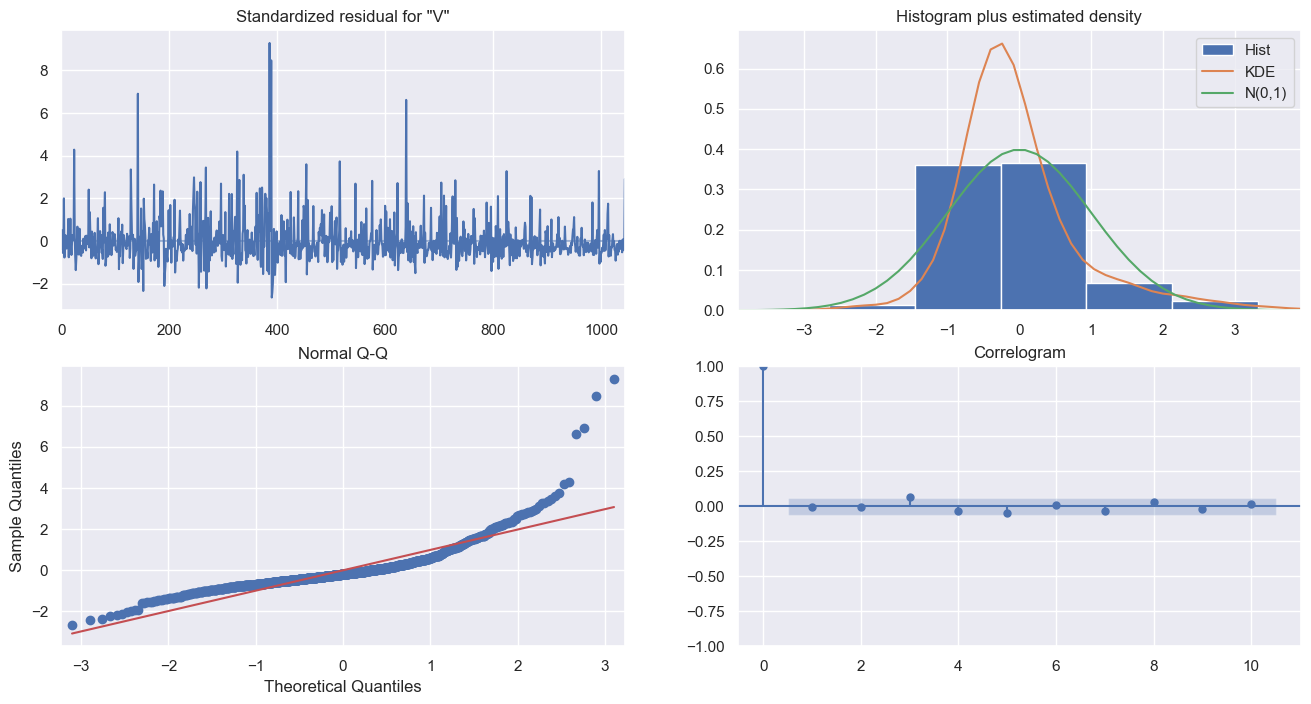

In [ ]:
results_ARIMA.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
final_hat_avg = test_final.copy()
pred_ARIMA = results_ARIMA.forecast(steps=len(test_final))
pred_ARIMA

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1048    3.263291e+06
1049    2.681201e+06
1050    2.693864e+06
1051    2.705847e+06
1052    2.717187e+06
            ...     
1230    2.917030e+06
1231    2.917031e+06
1232    2.917031e+06
1233    2.917032e+06
1234    2.917032e+06
Name: predicted_mean, Length: 187, dtype: float64

In [ ]:
len(test_final)

187

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume, pred_ARIMA, squared=False))
print(rmse)

1167.3586190228277


In [ ]:
# calculate MAPE
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual))*100

In [ ]:
mape1 = calculate_mape(test_final.Volume, pred_ARIMA)
print("MAPE :", mape1)

MAPE : 76.80171949236288


In [ ]:
resultDF = pd.DataFrame({'Test RMSE' : rmse}, index=['ARIMA(1, 0, 2)'])
resultDF

Test RMSE
ARIMA(1, 0, 2)  1167.358619

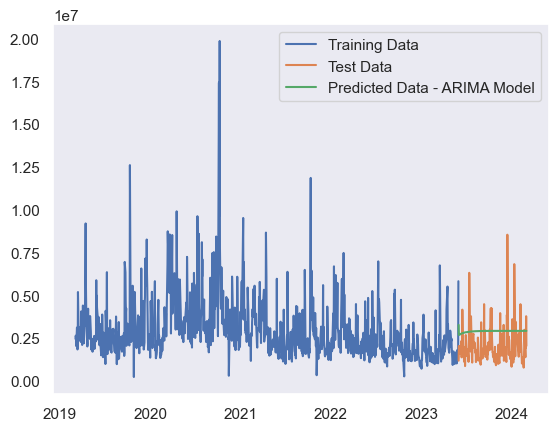

In [ ]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA Model')
plt.legend(loc='best')
plt.grid()

# Build SARIMA Model

In [ ]:
# creating an empty DataFrame with column names
dfobj2 = pd.DataFrame(columns=['Param', 'seasonal','AIC'])
dfobj2

Empty DataFrame
Columns: [Param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=param, seasonal_order=param_seasonal,
                                         enforce_stationarity=False,enforce_invertibility=False)
        results_SARIMA = model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfobj2 = dfobj2.append({'Param':param, "seasonal":param_seasonal, 'AIC':results_SARIMA.aic}, ignore_index=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:34460.65769573934
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:33879.119577046535


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:33574.01888940562


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:33160.21724404655


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:32794.75640334122


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:32620.094957982656


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:32805.46984304224


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:32646.830423591535


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:32612.355510667257
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:33889.991548216334


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:33617.3092799735


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:33388.8300234927


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:33558.34655182397


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:33402.531558350645


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:33241.52012236272


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:33344.9056943351


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:33305.79976481021


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:33243.982547954685
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:33735.83618829531


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:33517.804900270436


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:33321.350856738325


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:33552.456349683955


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:33366.607582137585


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:33205.908668404525


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:33342.558881424484


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:33302.57562711834


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:33208.01116666998
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:32932.79471805483


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:32781.577723087816


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:32617.889359636996


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:32781.54396270217


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:32599.195643503506


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:32440.58446405051


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:32617.47009018433


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:32440.66395045304


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:32442.45026480921


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:32635.6685403528


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:32477.891562013243


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:32324.24246602074


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:32508.557895026803


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:32478.787330882024


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:32324.402417545465


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:32354.65967049974


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:32354.64409897548


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:32324.163090820475


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:32580.815887756246


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:32428.351709792307


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:32274.55064780338


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:32489.173811265657


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:32427.92741282426


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:32273.939040267018


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:32335.22101472952


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:32334.6834901091


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:32273.033419963016
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:32775.15136064486


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:32654.207162447205


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:32496.765076755182


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:32623.559766752736


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:32533.87907468592


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:32405.972054674723


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:32466.138715215875


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:32374.486772814686


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:32372.733506319


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:32610.951282216112


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:32459.21372512132


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:32305.58997389391


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:32459.318698942487


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:32460.767568025534


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:32306.553500026603


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:32305.621208666285


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:32306.64028326085


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:32306.45897598011
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:32579.714099117904


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:32429.119040926988


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:32275.139829302414


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:32459.50791224792


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:32427.76001292266


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:32273.692324666325


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:32305.506963045642


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:32303.90657733666


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:32272.126756491394


In [ ]:
dfobj2.sort_values(by=['AIC'])

Param      seasonal           AIC
80  (2, 0, 2)  (2, 0, 2, 5)  32272.126756
53  (1, 0, 2)  (2, 0, 2, 5)  32273.033420
77  (2, 0, 2)  (1, 0, 2, 5)  32273.692325
50  (1, 0, 2)  (1, 0, 2, 5)  32273.939040
47  (1, 0, 2)  (0, 0, 2, 5)  32274.550648
..        ...           ...           ...
10  (0, 0, 1)  (0, 0, 1, 5)  33617.309280
18  (0, 0, 2)  (0, 0, 0, 5)  33735.836188
1   (0, 0, 0)  (0, 0, 1, 5)  33879.119577
9   (0, 0, 1)  (0, 0, 0, 5)  33889.991548
0   (0, 0, 0)  (0, 0, 0, 5)  34460.657696

[81 rows x 3 columns]

In [ ]:
# (2, 0, 2)	(2, 0, 2, 5)	32272.126756
model = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=(2,0,2), seasonal_order=(2,0,2,5),
                                         enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
print(results.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                 1048
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 5)   Log Likelihood              -16127.063
Date:                           Sun, 03 Mar 2024   AIC                          32272.127
Time:                                   09:47:32   BIC                          32316.606
Sample:                                        0   HQIC                         32289.004
                                          - 1048                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6080      0.095      6.407      0.000       0.422       0.794
ar.L2          0.3868      0.094      4.131

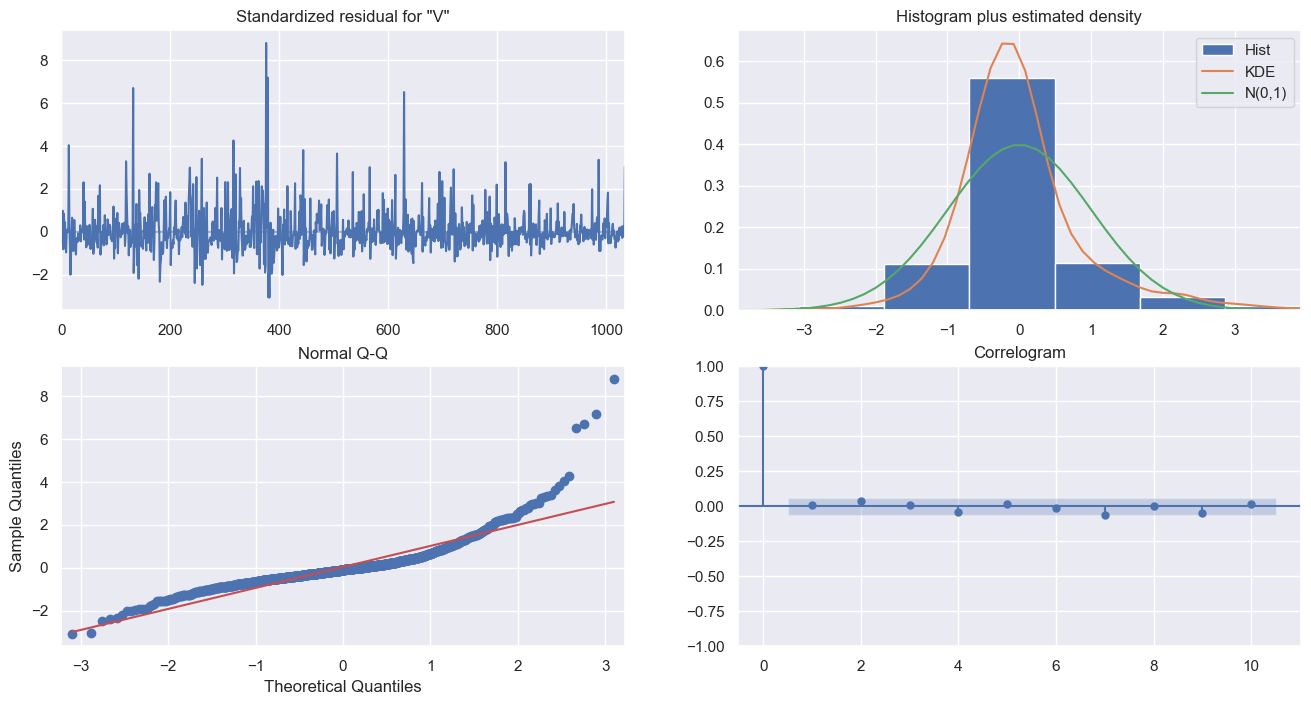

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
final_hat_avg = test_final.copy()
pred_SARIMA = results.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1048    2.954794e+06
1049    2.107281e+06
1050    2.453795e+06
1051    2.302101e+06
1052    1.906838e+06
            ...     
1230    1.057848e+06
1231    1.053869e+06
1232    1.049867e+06
1233    1.045943e+06
1234    1.042017e+06
Name: predicted_mean, Length: 187, dtype: float64

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMA.predicted_mean, squared=False))
print(rmse)

1101.4266741926408


In [ ]:
mape2 = calculate_mape(test_final.Volume, pred_SARIMA.predicted_mean)
print("MAPE :", mape2)

MAPE : 32.81113840826728


In [ ]:
resultDF1 = pd.DataFrame({'Test MAPE' : mape1}, index=['ARIMA(1, 0, 2)'])

resultDf2 = pd.DataFrame({'Test MAPE':mape2}, index=['SARIMA(2, 0, 2)(2, 0, 2, 5)'])
resultDf_final = pd.concat([resultDF1, resultDf2])
resultDf_final

Test MAPE
ARIMA(1, 0, 2)               76.801719
SARIMA(2, 0, 2)(2, 0, 2, 5)  32.811138

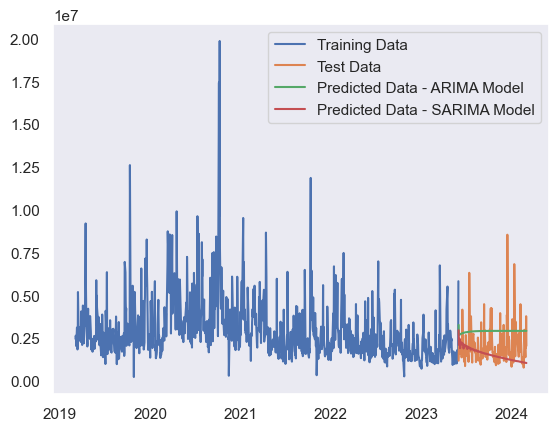

In [ ]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA Model')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA Model')
plt.legend(loc='best')
plt.grid()

# Build SARIMAX Model - include external factor

In [ ]:
df_final.head(2)

Open    High          Low        Close    Adj Close  \
Date                                                                     
2019-03-05  2005.000000  2007.0  1976.599976  1988.099976  1779.321777   
2019-03-06  1989.300049  2015.0  1985.050049  1999.599976  1789.614380   

             Volume  Year  Month  Days  
Date                                    
2019-03-05  2449622  2019      3     5  
2019-03-06  2635047  2019      3     6

In [ ]:
## Let's create exogeneious variable
## Open, High, Low, Close, Adj Close
ex_train = train[['Open','High','Low','Adj Close']]
ex_test = test[['Open','High','Low','Adj Close']]
ex_train.head()

Open         High          Low    Adj Close
Time_stamp                                                    
2019-03-05  2005.000000  2007.000000  1976.599976  1779.321777
2019-03-06  1989.300049  2015.000000  1985.050049  1789.614380
2019-03-07  2005.000000  2024.050049  2000.199951  1801.875488
2019-03-08  2025.000000  2033.000000  2010.050049  1810.288330
2019-03-11  2028.900024  2033.000000  2003.650024  1803.217896

In [ ]:
dfobj3 = pd.DataFrame(columns=['Param', 'seasonal','AIC'])
dfobj3

Empty DataFrame
Columns: [Param, seasonal, AIC]
Index: []

In [ ]:
# Let's first use SARIMAX with exogenous variable (extrnal factor)
for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train_final['Volume'],exog=ex_train,
                                         order=param, seasonal_order=param_seasonal,
                                         enforce_stationarity=False,
                                          enforce_invertibility=False)
        results_SARIMAX = model.fit()
        print('SARIMAX{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfobj3 = dfobj3.append({'param':param, 'seasonal':param_seasonal,
                               'AIC':results_SARIMAX.aic}, ignore_index=True)


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 0)(0, 0, 0, 5) - AIC:38898.53287432231
SARIMAX(0, 0, 0)(0, 0, 1, 5) - AIC:32445.165702216695


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 0)(0, 0, 2, 5) - AIC:32272.298500730634
SARIMAX(0, 0, 0)(1, 0, 0, 5) - AIC:32450.8706438725


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 0)(1, 0, 1, 5) - AIC:32373.20097881185


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 0)(1, 0, 2, 5) - AIC:32216.681771574353


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 0)(2, 0, 0, 5) - AIC:32278.854967974614


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 0)(2, 0, 1, 5) - AIC:32246.219959107184


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 0)(2, 0, 2, 5) - AIC:32218.065334122162


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(0, 0, 0, 5) - AIC:32480.202338635296


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(0, 0, 1, 5) - AIC:32300.51459117199


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(0, 0, 2, 5) - AIC:32141.00668588531


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(1, 0, 0, 5) - AIC:32354.375971737823


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(1, 0, 1, 5) - AIC:32263.19598012365


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(1, 0, 2, 5) - AIC:32110.04424283006


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(2, 0, 0, 5) - AIC:32193.321101681526


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(2, 0, 1, 5) - AIC:32170.28683284345


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 1)(2, 0, 2, 5) - AIC:32111.961530042056


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(0, 0, 0, 5) - AIC:32415.101329768426


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(0, 0, 1, 5) - AIC:32245.980792222388


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(0, 0, 2, 5) - AIC:32089.23547033523


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(1, 0, 0, 5) - AIC:32333.00148274142


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(1, 0, 1, 5) - AIC:32216.31038514066


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(1, 0, 2, 5) - AIC:32063.933667146033


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(2, 0, 0, 5) - AIC:32174.81463575766


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(2, 0, 1, 5) - AIC:32154.47391450141


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 0, 2)(2, 0, 2, 5) - AIC:32065.91953465521
SARIMAX(1, 0, 0)(0, 0, 0, 5) - AIC:32434.387944009148


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 0)(0, 0, 1, 5) - AIC:32273.38722114502


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 0)(0, 0, 2, 5) - AIC:32119.294332309066


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 0)(1, 0, 0, 5) - AIC:32271.492456011936


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 0)(1, 0, 1, 5) - AIC:32249.648126550495


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 0)(1, 0, 2, 5) - AIC:32097.57995289376


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 0)(2, 0, 0, 5) - AIC:32116.371349544374


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 0)(2, 0, 1, 5) - AIC:32097.58940459458


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 0)(2, 0, 2, 5) - AIC:32099.5739234453


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(0, 0, 0, 5) - AIC:32292.292364414145


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(0, 0, 1, 5) - AIC:32142.614337715215


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(0, 0, 2, 5) - AIC:31993.16625364485


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(1, 0, 0, 5) - AIC:32173.224812863937


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(1, 0, 1, 5) - AIC:32144.103490117017


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(1, 0, 2, 5) - AIC:31995.162749075338


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(2, 0, 0, 5) - AIC:32023.05794022915


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(2, 0, 1, 5) - AIC:32025.056971017562


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 1)(2, 0, 2, 5) - AIC:31997.219411383645


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(0, 0, 0, 5) - AIC:32262.51680129835


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(0, 0, 1, 5) - AIC:32113.172921916645


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(0, 0, 2, 5) - AIC:31962.99893173866


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(1, 0, 0, 5) - AIC:32173.731904996297


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(1, 0, 1, 5) - AIC:32114.41760666035


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(1, 0, 2, 5) - AIC:31964.949266106127


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(2, 0, 0, 5) - AIC:32023.26396215393


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(2, 0, 1, 5) - AIC:32025.203104428285


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(1, 0, 2)(2, 0, 2, 5) - AIC:31966.959799484135
SARIMAX(2, 0, 0)(0, 0, 0, 5) - AIC:32352.410350661507


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 0)(0, 0, 1, 5) - AIC:32231.02506712819


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 0)(0, 0, 2, 5) - AIC:32079.98446676584


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 0)(1, 0, 0, 5) - AIC:32200.08800128675


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 0)(1, 0, 1, 5) - AIC:32188.909372927337


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 0)(1, 0, 2, 5) - AIC:32069.087029485454


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 0)(2, 0, 0, 5) - AIC:32049.54170519137


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 0)(2, 0, 1, 5) - AIC:32039.14994536016


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 0)(2, 0, 2, 5) - AIC:32041.055433835085


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(0, 0, 0, 5) - AIC:32292.304790784365


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(0, 0, 1, 5) - AIC:32143.096029761466


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(0, 0, 2, 5) - AIC:31993.319079943758


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(1, 0, 0, 5) - AIC:32143.149491289565


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(1, 0, 1, 5) - AIC:32144.308635194873


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(1, 0, 2, 5) - AIC:31995.274906748775


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(2, 0, 0, 5) - AIC:31993.356846654744


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(2, 0, 1, 5) - AIC:31995.28527296949


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 1)(2, 0, 2, 5) - AIC:31997.292740142315


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(0, 0, 0, 5) - AIC:32261.228939055287


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(0, 0, 1, 5) - AIC:32110.732861561515


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(0, 0, 2, 5) - AIC:31960.75778324406


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(1, 0, 0, 5) - AIC:32140.847473994476


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(1, 0, 1, 5) - AIC:32112.020457829785


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(1, 0, 2, 5) - AIC:31962.744270279807


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(2, 0, 0, 5) - AIC:31991.188748391065


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(2, 0, 1, 5) - AIC:31993.16076608718


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(2, 0, 2)(2, 0, 2, 5) - AIC:31964.753034820882


##### Please ensure to use forward or backward approach to indentify which variable would be extranal factor to influence Volume
![image.png](attachment:image.png)

In [ ]:
dfobj3.sort_values(by=['AIC'])

Param      seasonal           AIC      param
74   NaN  (0, 0, 2, 5)  31960.757783  (2, 0, 2)
77   NaN  (1, 0, 2, 5)  31962.744270  (2, 0, 2)
47   NaN  (0, 0, 2, 5)  31962.998932  (1, 0, 2)
80   NaN  (2, 0, 2, 5)  31964.753035  (2, 0, 2)
50   NaN  (1, 0, 2, 5)  31964.949266  (1, 0, 2)
..   ...           ...           ...        ...
27   NaN  (0, 0, 0, 5)  32434.387944  (1, 0, 0)
1    NaN  (0, 0, 1, 5)  32445.165702  (0, 0, 0)
3    NaN  (1, 0, 0, 5)  32450.870644  (0, 0, 0)
9    NaN  (0, 0, 0, 5)  32480.202339  (0, 0, 1)
0    NaN  (0, 0, 0, 5)  38898.532874  (0, 0, 0)

[81 rows x 4 columns]

In [ ]:
# SARIMAX : (2, 0, 2),(0, 0, 2, 5) AIC : 31960.757783
model = sm.tsa.statespace.SARIMAX(train_final['Volume'],exog=ex_train,
                                         order=(2,0,2),seasonal_order=(0,0,2,5),
                                         enforce_stationarity=False,
                                          enforce_invertibility=False)
results = model.fit()
print(results.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                 1048
Model:             SARIMAX(2, 0, 2)x(0, 0, 2, 5)   Log Likelihood              -15969.379
Date:                           Sun, 03 Mar 2024   AIC                          31960.758
Time:                                   10:39:59   BIC                          32015.122
Sample:                                        0   HQIC                         31981.385
                                          - 1048                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open       -1.135e+04   1510.865     -7.515      0.000   -1.43e+04   -8392.545
High        4.916e+04   2097.844     23.435

In [ ]:
pred_SARIMAX = results.get_forecast(steps=len(test), exog=ex_test)
pred_SARIMAX.predicted_mean

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1048    2.189250e+06
1049    1.728101e+06
1050    2.167418e+06
1051    2.741627e+06
1052    1.436534e+06
            ...     
1230    9.580629e+05
1231    3.443788e+06
1232    1.252868e+06
1233    1.315684e+06
1234    7.174277e+05
Name: predicted_mean, Length: 187, dtype: float64

In [ ]:
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMAX.predicted_mean, squared=False))
print(rmse)

1103.497030201226


In [ ]:
mape3 = calculate_mape(test_final.Volume, pred_SARIMAX.predicted_mean)
print("MAPE :", mape3)

MAPE : 52.45156881399951


# Facebook Prophet Time Series Forecasting Model

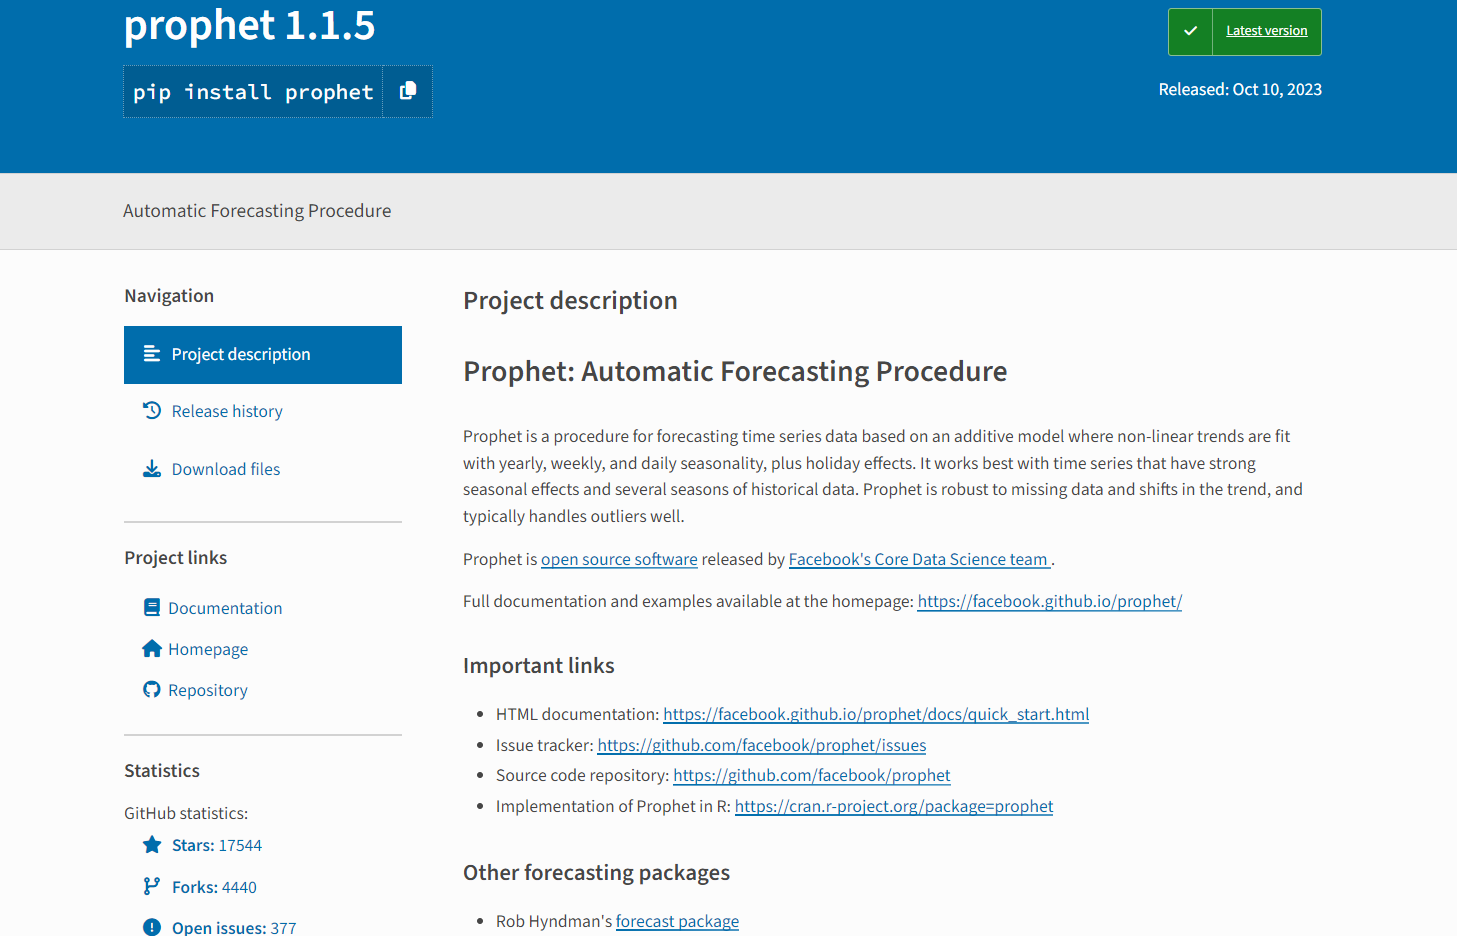

In [4]:
!pip install prophet

In [5]:
import prophet

In [6]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [7]:
df.head()

Date         Open         High          Low        Close  \
0  2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976   
1  2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976   
2  2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049   
3  2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951   
4  2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049   

     Adj Close   Volume  
0  1779.321777  2449622  
1  1789.614380  2635047  
2  1801.875488  2539884  
3  1810.288330  2031071  
4  1803.217896  3111689

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1236 non-null   datetime64[ns]
 1   Open       1236 non-null   float64       
 2   High       1236 non-null   float64       
 3   Low        1236 non-null   float64       
 4   Close      1236 non-null   float64       
 5   Adj Close  1236 non-null   float64       
 6   Volume     1236 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
len(df)

1236

In [12]:
df['Date'].nunique()

1236

In [13]:
df['Date'].min()

Timestamp('2019-03-05 00:00:00')

In [14]:
df['Date'].max()

Timestamp('2024-03-02 00:00:00')

In [15]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
total = df.groupby(['Date'])['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'].sum().reset_index()

In [17]:
total.head()

Date         Open         High          Low        Close    Adj Close  \
0 2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976  1779.321777   
1 2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976  1789.614380   
2 2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049  1801.875488   
3 2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951  1810.288330   
4 2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049  1803.217896   

    Volume  
0  2449622  
1  2635047  
2  2539884  
3  2031071  
4  3111689

In [ ]:
#  Please ensure to change your "date" to "ds" and "target variable" to "y" whenever you build prophet model

In [18]:
df_prophet = total.rename(columns={'Date':'ds', 'Volume':'y'})

In [19]:
df_prophet

ds         Open         High          Low        Close  \
0    2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976   
1    2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976   
2    2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049   
3    2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951   
4    2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049   
...         ...          ...          ...          ...          ...   
1231 2024-02-27  3999.000000  4124.000000  3999.000000  4104.399902   
1232 2024-02-28  4095.600098  4154.899902  4089.000000  4118.950195   
1233 2024-02-29  4099.000000  4138.100098  4064.550049  4095.100098   
1234 2024-03-01  4107.200195  4140.000000  4086.800049  4094.350098   
1235 2024-03-02  4112.700195  4129.500000  4105.649902  4094.350098   

        Adj Close        y  
0     1779.321777  2449622  
1     1789.614380  2635047  
2     1801.875488  2539884  
3     1810.288330  2031071  
4     1803.217896  3111689  
...           ...      ...  
1231  4104.399902  2960475  
1232  4118.950195  1939225  
1233  4095.100098  3772719  
1234  4094.350098  2043265  
1235  4094.350098    26465  

[1236 rows x 7 columns]

In [20]:
from prophet import Prophet

In [21]:
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg35d2b33/2x_7ik09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg35d2b33/54v0zif0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23241', 'data', 'file=/tmp/tmpg35d2b33/2x_7ik09.json', 'init=/tmp/tmpg35d2b33/54v0zif0.json', 'output', 'file=/tmp/tmpg35d2b33/prophet_model69e8ye2p/prophet_model-20240303053848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:38:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [23]:
# Build TimeSeries Forecasting Model
future_global = model.make_future_dataframe(periods=100, freq='D')

In [24]:
future_global.tail(20)

ds
1316 2024-05-22
1317 2024-05-23
1318 2024-05-24
1319 2024-05-25
1320 2024-05-26
1321 2024-05-27
1322 2024-05-28
1323 2024-05-29
1324 2024-05-30
1325 2024-05-31
1326 2024-06-01
1327 2024-06-02
1328 2024-06-03
1329 2024-06-04
1330 2024-06-05
1331 2024-06-06
1332 2024-06-07
1333 2024-06-08
1334 2024-06-09
1335 2024-06-10

In [25]:
len(future_global)

1336

In [26]:
prediction = model.predict(future_global)

In [28]:
prediction.head(2)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2019-03-05  1.700314e+06  1.273874e+06  4.794555e+06  1.700314e+06   
1 2019-03-06  1.703663e+06  1.110537e+06  4.539235e+06  1.703663e+06   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  1.700314e+06    1.294905e+06          1.294905e+06          1.294905e+06   
1  1.703663e+06    1.128561e+06          1.128561e+06          1.128561e+06   

          weekly   weekly_lower   weekly_upper         yearly   yearly_lower  \
0  807926.507227  807926.507227  807926.507227  486978.026365  486978.026365   
1  613634.602756  613634.602756  613634.602756  514925.983883  514925.983883   

    yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  486978.026365                   0.0                         0.0   
1  514925.983883                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  2.995218e+06  
1                         0.0  2.832223e+06

In [29]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [30]:
prediction[['ds','yhat_lower','yhat_upper','yhat']].tail(20)

ds    yhat_lower    yhat_upper          yhat
1316 2024-05-22 -2.185051e+05  3.484814e+06  1.633552e+06
1317 2024-05-23  1.648763e+05  3.854975e+06  1.977084e+06
1318 2024-05-24  4.343328e+05  4.010327e+06  2.170029e+06
1319 2024-05-25 -2.331240e+06  1.250922e+06 -6.018606e+05
1320 2024-05-26 -2.978834e+06  6.142186e+05 -1.120301e+06
1321 2024-05-27  2.022842e+05  3.736086e+06  1.948259e+06
1322 2024-05-28  3.425386e+05  3.881786e+06  2.063854e+06
1323 2024-05-29  9.262410e+04  3.674920e+06  1.884972e+06
1324 2024-05-30  4.173212e+05  3.860160e+06  2.182991e+06
1325 2024-05-31  6.488965e+05  4.039935e+06  2.326825e+06
1326 2024-06-01 -2.326785e+06  1.247998e+06 -4.966499e+05
1327 2024-06-02 -2.886328e+06  6.517691e+05 -1.067988e+06
1328 2024-06-03  1.557382e+05  3.788132e+06  1.947531e+06
1329 2024-06-04  1.971360e+05  3.742534e+06  2.011096e+06
1330 2024-06-05  6.766027e+04  3.594234e+06  1.782313e+06
1331 2024-06-06  1.369807e+05  3.759239e+06  2.033617e+06
1332 2024-06-07  2.997423e+05  3.938763e+06  2.134894e+06
1333 2024-06-08 -2.510110e+06  9.860223e+05 -7.261036e+05
1334 2024-06-09 -2.981574e+06  4.803410e+05 -1.329174e+06
1335 2024-06-10 -1.008629e+05  3.548793e+06  1.661029e+06

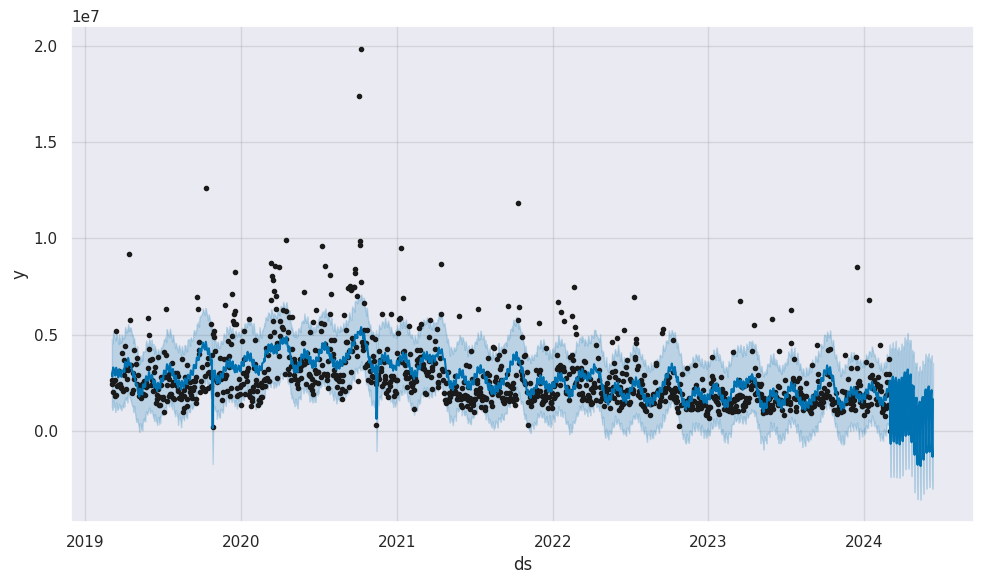

In [32]:
model.plot(prediction)
plt.show()

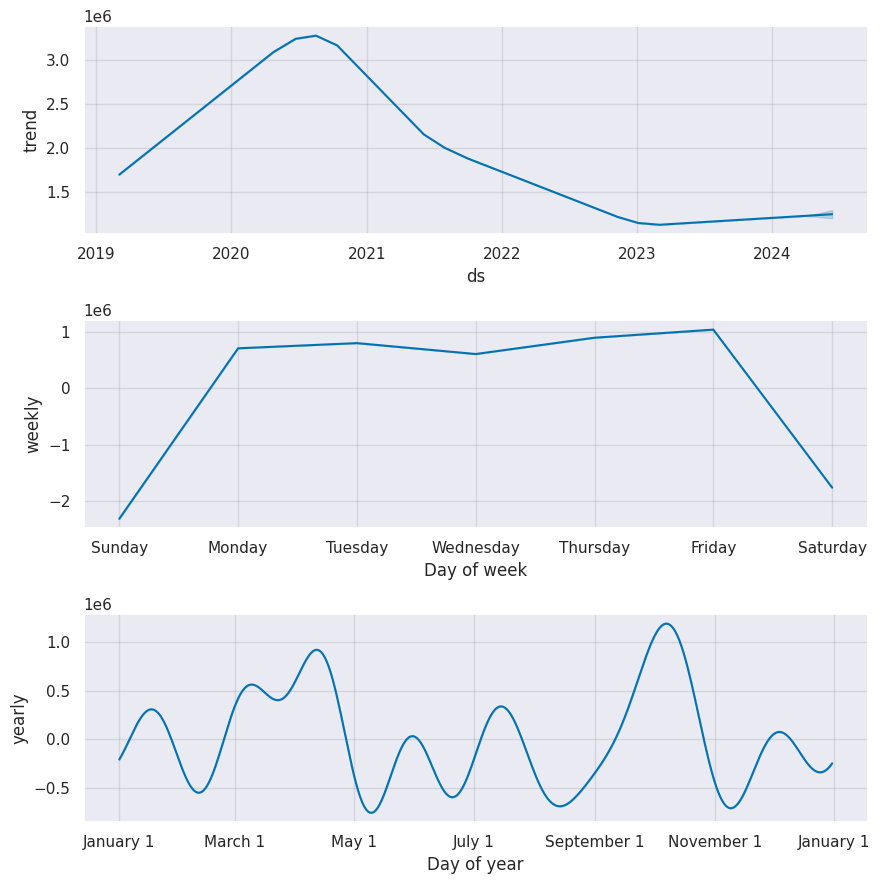

In [33]:
model.plot_components(prediction)
plt.show()

In [34]:
# Find the accuracy along with cross validation method
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial='90 days')

INFO:prophet:Making 114 forecasts with cutoffs between 2019-06-12 00:00:00 and 2024-02-01 00:00:00


  0%|          | 0/114 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg35d2b33/jdzlpx0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg35d2b33/09vf2unr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50571', 'data', 'file=/tmp/tmpg35d2b33/jdzlpx0n.json', 'init=/tmp/tmpg35d2b33/09vf2unr.json', 'output', 'file=/tmp/tmpg35d2b33/prophet_modeljr7j49v_/prophet_model-20240303060042.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:00:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:00:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg35d2b33/kh48cna7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg35d2b33/ra_7zii7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [35]:
df_cv

ds          yhat    yhat_lower    yhat_upper        y     cutoff
0    2019-06-13  3.490484e+06  2.253154e+06  4.799495e+06  3320916 2019-06-12
1    2019-06-14  4.179420e+06  2.844434e+06  5.516054e+06  2131408 2019-06-12
2    2019-06-17  8.918216e+06  7.605888e+06  1.020747e+07  1489497 2019-06-12
3    2019-06-18  1.158365e+07  1.037722e+07  1.292582e+07  1877447 2019-06-12
4    2019-06-19  1.445674e+07  1.318008e+07  1.570683e+07  1652817 2019-06-12
...         ...           ...           ...           ...      ...        ...
2315 2024-02-27  2.116820e+06  4.063303e+05  3.943512e+06  2960475 2024-02-01
2316 2024-02-28  1.991936e+06  1.626291e+05  3.700837e+06  1939225 2024-02-01
2317 2024-02-29  2.333941e+06  5.729688e+05  4.112434e+06  3772719 2024-02-01
2318 2024-03-01  2.538626e+06  7.395436e+05  4.221019e+06  2043265 2024-02-01
2319 2024-03-02 -5.648046e+05 -2.549689e+06  1.279588e+06    26465 2024-02-01

[2320 rows x 6 columns]

In [36]:
# Check perforance
from prophet.diagnostics import performance_metrics

In [37]:
df_performance = performance_metrics(df_cv)
df_performance

horizon           mse          rmse           mae      mape     mdape  \
0   3 days  3.079986e+12  1.754989e+06  1.076390e+06  0.428320  0.296814   
1   4 days  3.474048e+12  1.863880e+06  1.214778e+06  0.472806  0.343538   
2   5 days  3.701206e+12  1.923852e+06  1.256068e+06  0.445951  0.354911   
3   6 days  4.348159e+12  2.085224e+06  1.390898e+06  0.545345  0.403037   
4   7 days  4.290643e+12  2.071387e+06  1.393879e+06  0.600123  0.398037   
5   8 days  5.790211e+12  2.406286e+06  1.474046e+06  0.608291  0.377458   
6   9 days  7.229034e+12  2.688686e+06  1.502028e+06  0.551414  0.339557   
7  10 days  7.703793e+12  2.775571e+06  1.577443e+06  0.548788  0.381155   
8  11 days  8.979333e+12  2.996553e+06  1.614736e+06  0.614014  0.376514   
9  12 days  1.818360e+13  4.264223e+06  1.928593e+06  0.807780  0.401846   
10 13 days  3.232394e+13  5.685415e+06  2.212622e+06  0.980427  0.369227   
11 14 days  4.778361e+13  6.912569e+06  2.453773e+06  1.123654  0.385995   
12 15 days  5.675589e+13  7.533650e+06  2.466921e+06  1.144058  0.390963   
13 16 days  6.328298e+13  7.955060e+06  2.358742e+06  1.043454  0.366693   
14 17 days  5.480026e+13  7.402720e+06  2.200344e+06  0.990941  0.357781   
15 18 days  5.708415e+13  7.555405e+06  2.261649e+06  0.952067  0.348889   
16 19 days  1.019794e+14  1.009848e+07  2.890781e+06  1.149865  0.362889   
17 20 days  1.756885e+14  1.325475e+07  3.765617e+06  1.507984  0.365666   
18 21 days  2.474213e+14  1.572963e+07  4.352364e+06  1.873815  0.395534   
19 22 days  2.698531e+14  1.642721e+07  4.252404e+06  2.258722  0.386931   
20 23 days  2.695244e+14  1.641720e+07  3.867370e+06  2.002284  0.380490   
21 24 days  2.236735e+14  1.495572e+07  3.405664e+06  1.687098  0.347381   
22 25 days  2.003075e+14  1.415300e+07  3.484905e+06  1.425884  0.390557   
23 26 days  3.039862e+14  1.743520e+07  4.348472e+06  1.808965  0.386508   
24 27 days  4.569763e+14  2.137700e+07  5.484511e+06  2.195572  0.415121   
25 28 days  5.842292e+14  2.417083e+07  5.992887e+06  2.237800  0.376538   
26 29 days  5.451133e+14  2.334766e+07  5.319896e+06  2.012426  0.379419   
27 30 days  4.968664e+14  2.229050e+07  4.623322e+06  2.137826  0.362412   

       smape  coverage  
0   0.355030  0.853448  
1   0.409403  0.800851  
2   0.426406  0.772588  
3   0.474155  0.733878  
4   0.468220  0.730519  
5   0.461810  0.742525  
6   0.434822  0.764950  
7   0.461133  0.769289  
8   0.475772  0.765194  
9   0.513450  0.746795  
10  0.510951  0.742457  
11  0.502319  0.756493  
12  0.493929  0.767241  
13  0.462126  0.793103  
14  0.463182  0.798365  
15  0.458808  0.796462  
16  0.494952  0.766412  
17  0.525024  0.713859  
18  0.549868  0.679156  
19  0.536549  0.682913  
20  0.506176  0.702586  
21  0.467212  0.722774  
22  0.490861  0.703841  
23  0.512064  0.709952  
24  0.555022  0.693911  
25  0.529762  0.717868  
26  0.482844  0.757038  
27  0.459782  0.780172

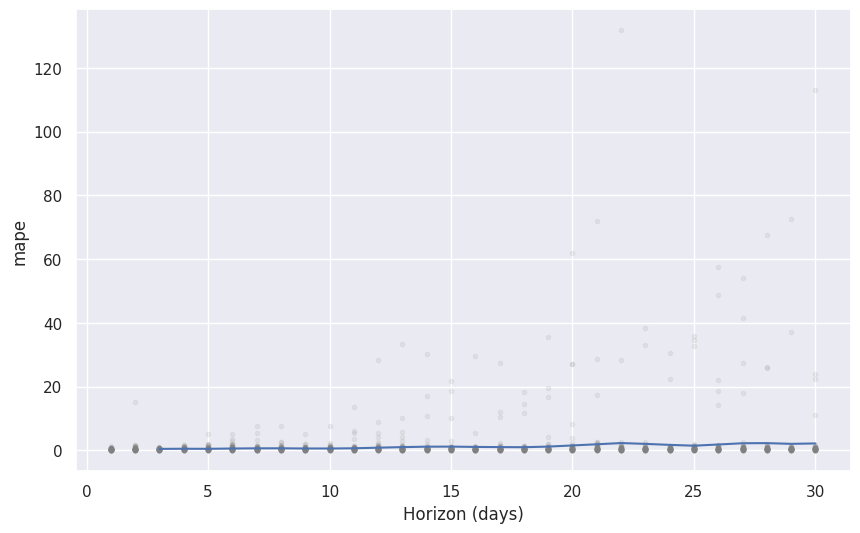

In [39]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

# DARTS Model

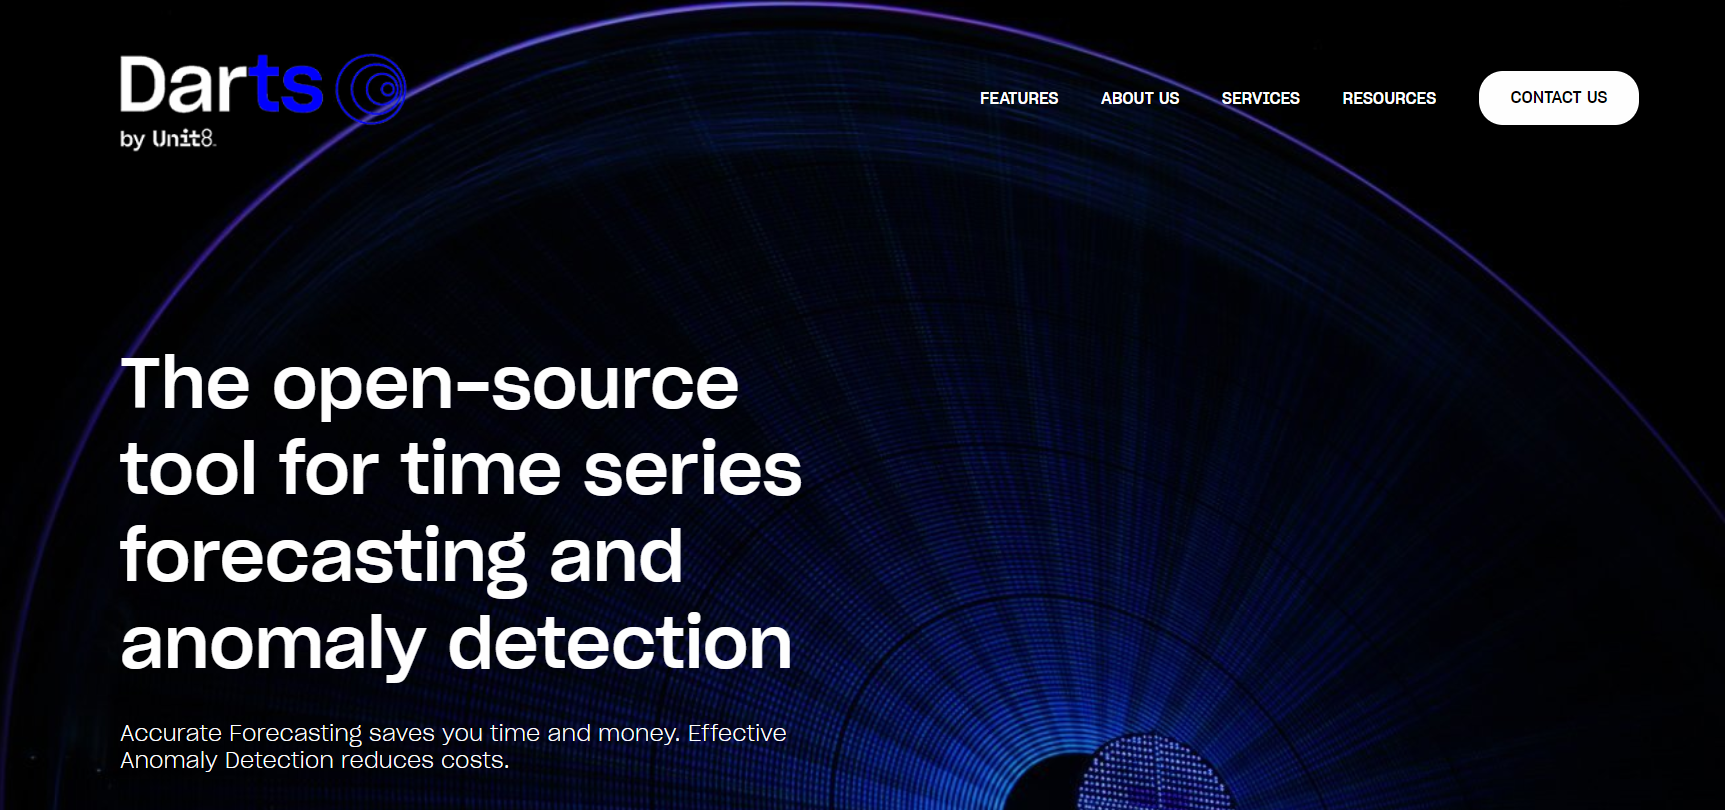

# https://pypi.org/project/darts/

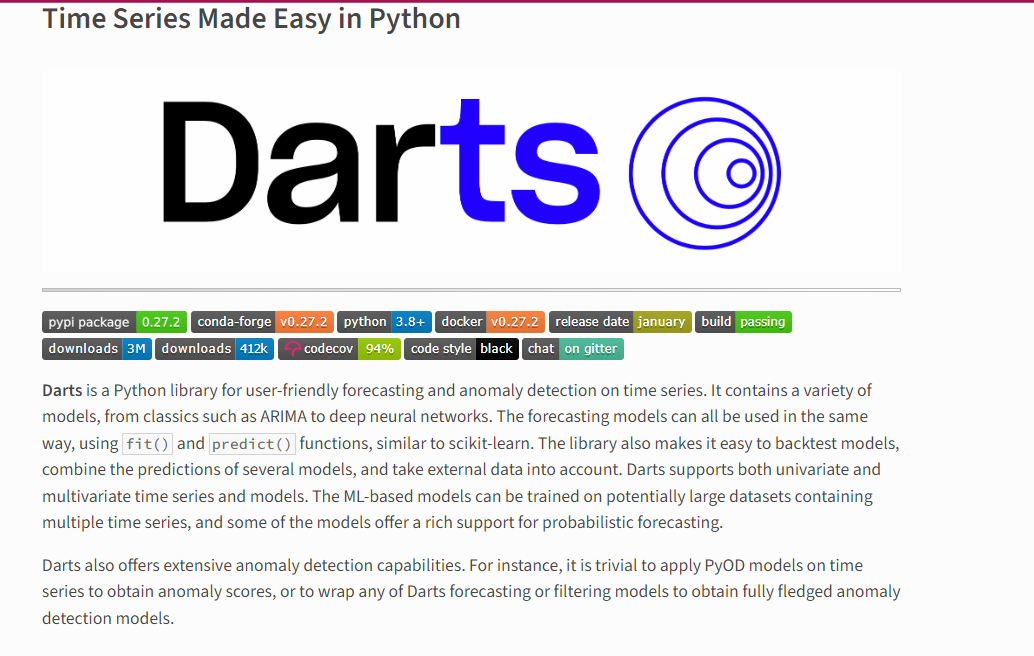

In [40]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.4/819.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [43]:
from  darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [44]:
AirPassengersDataset().load()

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [45]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: #Passengers, Length: 144, dtype: float64

In [46]:
MonthlyMilkDataset().load()

<TimeSeries (DataArray) (Month: 168, component: 1, sample: 1)>
array([[[589.]],

       [[561.]],

       [[640.]],

       [[656.]],

       [[727.]],

       [[697.]],

       [[640.]],

       [[599.]],

       [[568.]],

       [[577.]],

...

       [[892.]],

       [[903.]],

       [[966.]],

       [[937.]],

       [[896.]],

       [[858.]],

       [[817.]],

       [[827.]],

       [[797.]],

       [[843.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1962-01-01 1962-02-01 ... 1975-12-01
  * component  (component) object 'Pounds per cow'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [47]:
MonthlyMilkDataset().load().pd_series()

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Freq: MS, Name: Pounds per cow, Length: 168, dtype: float64

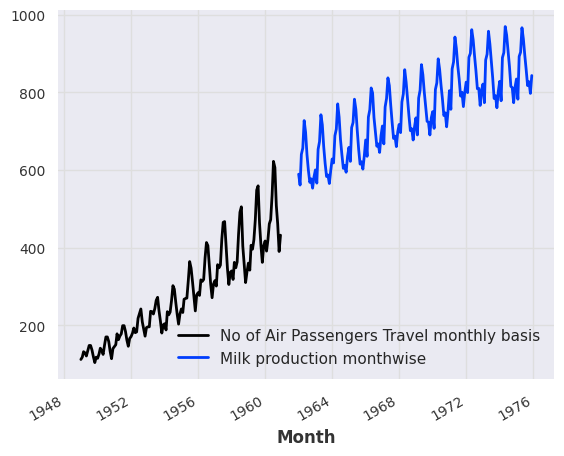

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
airline_dataset = AirPassengersDataset().load()
milk_dataset = MonthlyMilkDataset().load()

airline_dataset.plot(label="No of Air Passengers Travel monthly basis")
milk_dataset.plot(label="Milk production monthwise")
plt.legend()
plt.show()

In [51]:
# Mandatory steps - preprocessing (feature scaling)
from darts.dataprocessing.transformers import Scaler
airline_scale, milk_scale = Scaler(), Scaler()
airline_scale_df = airline_scale.fit_transform(airline_dataset)
milk_scale_df = milk_scale.fit_transform(milk_dataset)

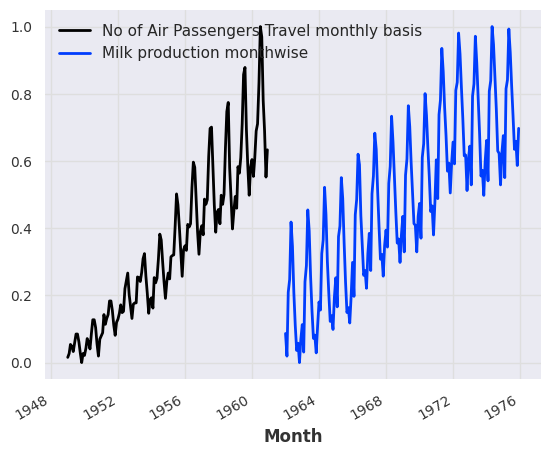

In [52]:
airline_scale_df.plot(label="No of Air Passengers Travel monthly basis")
milk_scale_df.plot(label="Milk production monthwise")
plt.legend()
plt.show()

In [68]:
# split the data into training and validation
train_air, val_air = airline_scale_df[:-36], airline_scale_df[-36:]

In [69]:
len(train_air)

108

In [55]:
len(val_air)

24

In [56]:
train_milk, val_milk = milk_scale_df[:-36], milk_scale_df[-36:]

In [58]:
len(train_milk)

132

In [59]:
len(val_milk)

36

# Building Time Series Forecasting model by using deep learning method - darts

In [64]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries

In [66]:
from darts.models import TCNModel, TransformerModel, NBEATSModel,RNNModel, RandomForest
from darts.metrics import mape

In [67]:
model_air_milk = NBEATSModel(input_chunk_length=24,output_chunk_length=12,n_epochs=100, random_state=0)

In [70]:
model_air_milk.fit([train_air, train_milk], verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE = 7.16%


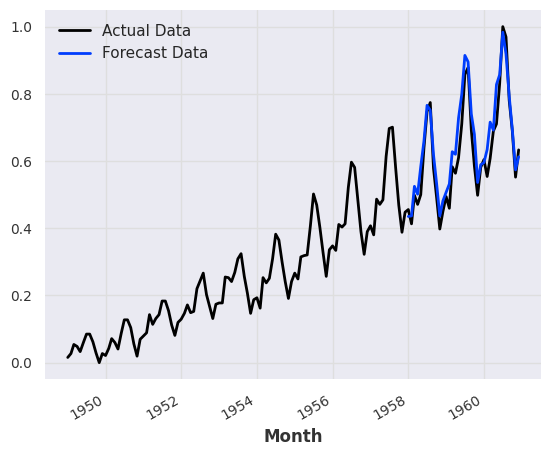

In [71]:
prediction = model_air_milk.predict(n=36, series=train_air)
airline_scale_df.plot(label="Actual Data")
prediction.plot(label="Forecast Data")
plt.legend()
print("MAPE = {:.2F}%".format(mape(airline_scale_df, prediction)))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE = 13.34%


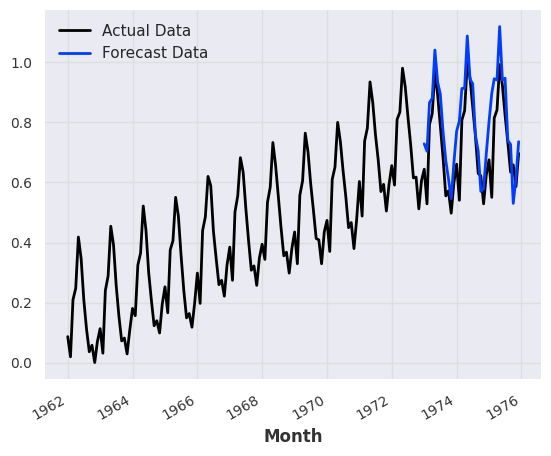

In [72]:
prediction = model_air_milk.predict(n=36, series=train_milk)
milk_scale_df.plot(label="Actual Data")
prediction.plot(label="Forecast Data")
plt.legend()
print("MAPE = {:.2F}%".format(mape(milk_scale_df, prediction)))